In [2]:
"""
House Pricing Linear Regression Model
=====================================
This script performs a linear regression analysis to predict house prices based on
the size of neighboring lots (`sqft_lot15`) and the categorical condition (`condition`) of houses.
The dataset used in this script is sourced from a publicly available repository.

Dependencies:
- pandas: For data manipulation and loading the dataset.
- statsmodels: For performing and analyzing the linear regression model.

Data Source:
The house pricing dataset is loaded directly from a GitHub repository.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling

# Load the dataset from the provided URL
# The dataset contains house pricing data, including features such as lot size and condition
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
house_pricing = pd.read_csv(url)

# Fit a linear regression model
# - 'price' is the dependent variable (target) we aim to predict.
# - 'sqft_lot15' represents the size of neighboring lots (continuous feature).
# - 'C(condition)' treats the 'condition' feature as a categorical variable.
mod = smf.ols('price ~ sqft_lot15 + C(condition)', data=house_pricing).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     49.39
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           5.82e-51
Time:                        19:40:14   Log-Likelihood:            -2.4603e+05
No. Observations:               17290   AIC:                         4.921e+05
Df Residuals:                   17284   BIC:                         4.921e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.261e+05   7.05e+0

           id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  6840701095  20150403T000000         3       1.00         1740      4400   
1  1025049114  20140717T000000         3       2.25         1270      1566   
2  4025300360  20150326T000000         3       2.00         1130     16875   
3  5536500200  20140918T000000         5       3.50         3760      4857   
4  1245003660  20150321T000000         3       2.00         1470      6000   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     1.5           0     0          3  ...        1740              0   
1     2.0           0     0          3  ...        1060            210   
2     1.0           0     0          4  ...        1130              0   
3     2.0           0     3          3  ...        2820            940   
4     1.0           0     0          3  ...        1090            380   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1924    

<ipython-input-25-e6daf0e3e695>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


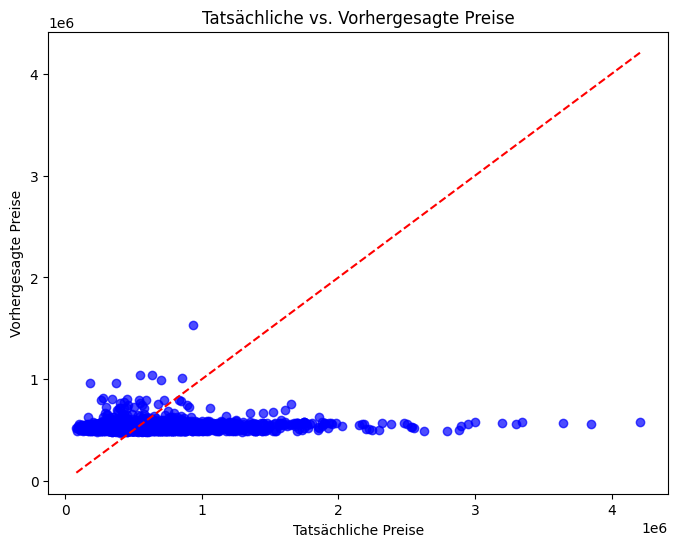

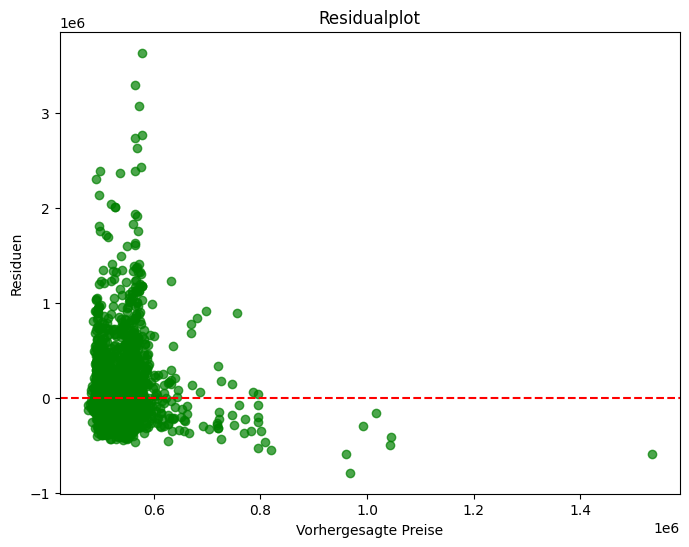

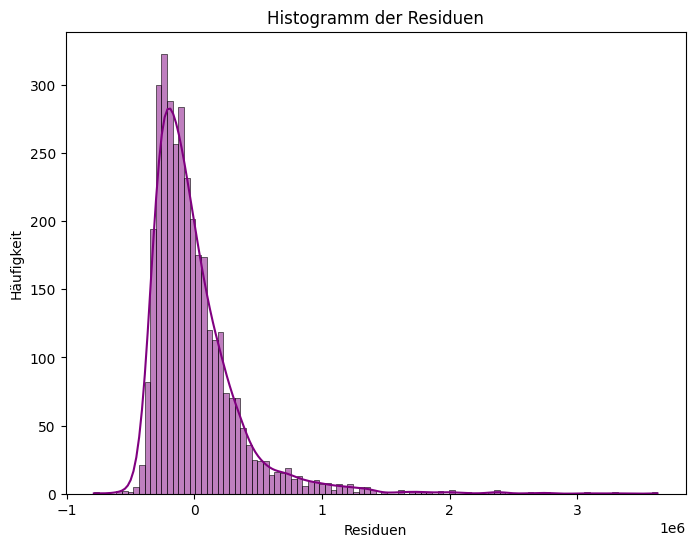

<ipython-input-25-e6daf0e3e695>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koeffizient', y='Feature', data=coefficients, palette="Blues_r")


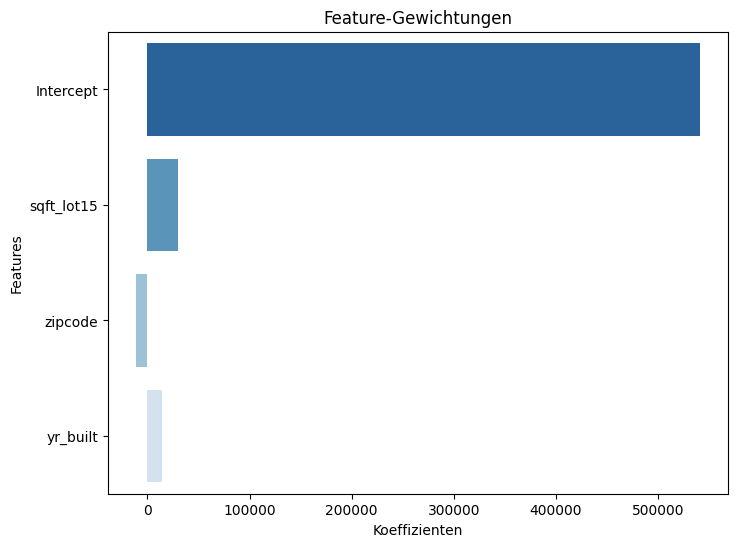

In [25]:
"""
House Price Prediction using Multiple Linear Regression
========================================================
This script builds and evaluates a multiple linear regression model to predict house prices
based on selected features such as lot size of neighboring properties, zip code, and year built.
The dataset is scaled, split into training and testing sets, and visualized using error analysis plots.

Dependencies:
- pandas: For data loading and manipulation.
- statsmodels: For building and summarizing the regression model.
- scikit-learn: For data preprocessing (scaling, train-test split).
- matplotlib & seaborn: For visualizations (scatter plots, residual plots, and histograms).

Data Source:
The dataset is loaded from an open repository containing house pricing data.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the house pricing dataset
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include 'sqft_lot15' (neighboring lot size), 'zipcode' (location), and 'yr_built' (year built)
features = ['sqft_lot15', 'zipcode', 'yr_built']
X = data[features]
y = data['price']  # Target variable: house price

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


Vorhersagen für Testdaten: 2950     245939.771753
16390    265558.143841
4999     760625.993041
1599     459134.543747
9575     458684.537795
dtype: float64
Mean Absolute Error (MAE): 204462.96
Mean Squared Error (MSE): 90143420341.34
Mean Absolute Percentage Error (MAPE): 43.73%


<ipython-input-19-5dbaaf28045e>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


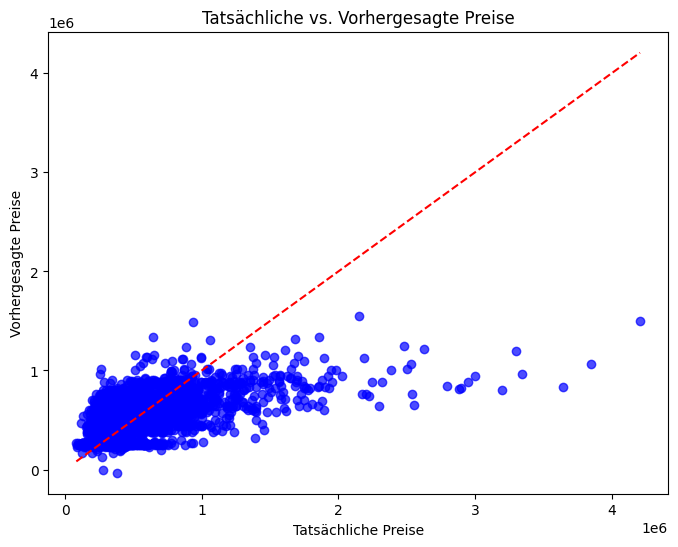

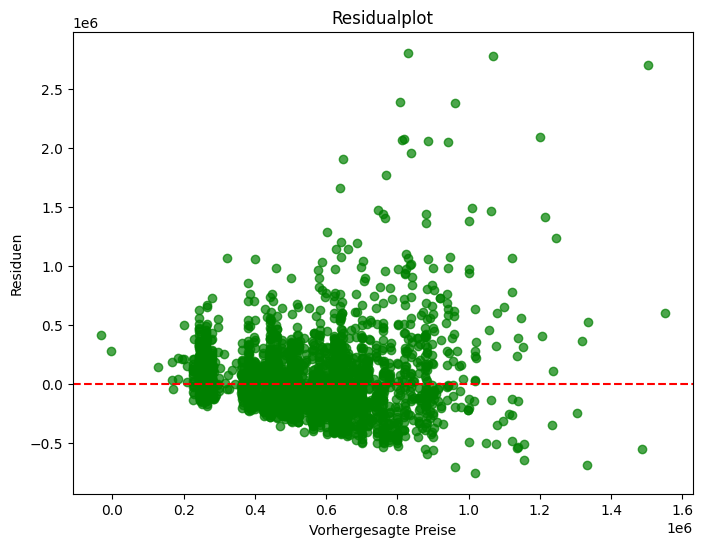

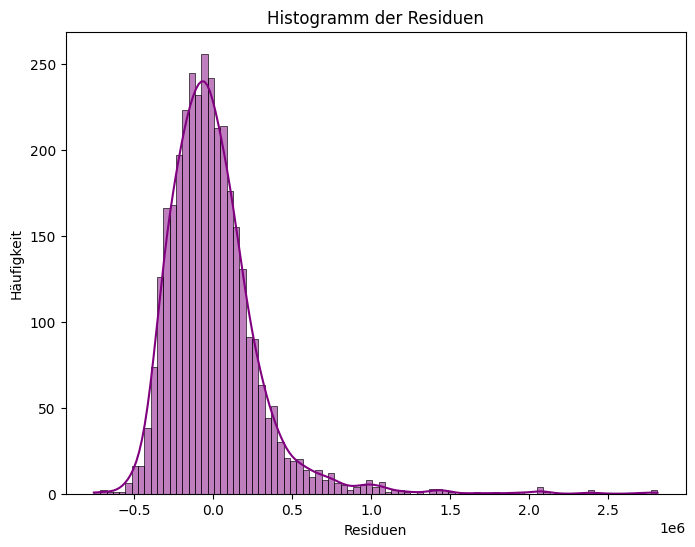

<ipython-input-19-5dbaaf28045e>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koeffizient', y='Feature', data=coefficients, palette="Blues_r")


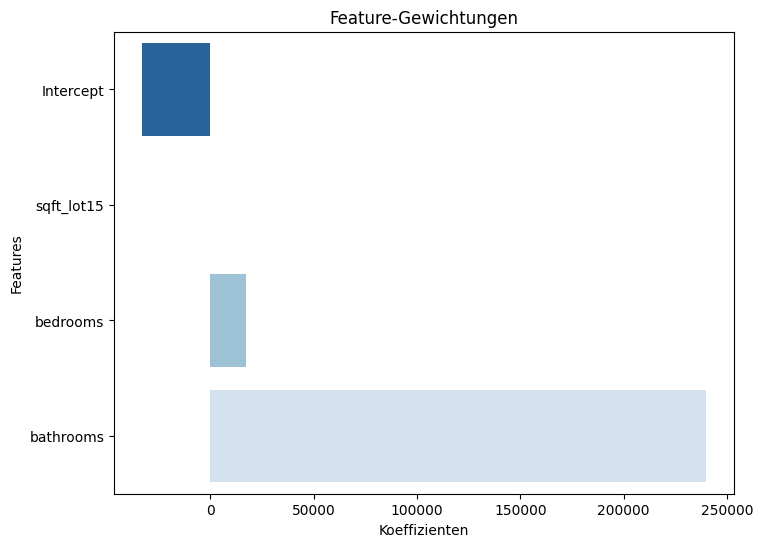

In [19]:
"""
House Price Prediction using SGD Regressor
===========================================
This script uses a Stochastic Gradient Descent (SGD) regressor to predict house prices
based on selected features such as lot size, number of bedrooms, and number of bathrooms.
The dataset is split into training and testing sets, and the model is evaluated using various
error metrics and visualizations.

Dependencies:
- pandas: For data loading and manipulation.
- scikit-learn: For regression, data splitting, and evaluation metrics.
- matplotlib & seaborn: For visualizing predictions and residuals.

Data Source:
The dataset is publicly available and contains house pricing data.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Load the house pricing dataset
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
data = pd.read_csv(url)

# Select features and target variable
# Features include 'sqft_lot15' (lot size), 'bedrooms', and 'bathrooms'
features = ['sqft_lot15', 'bedrooms', 'bathrooms']
X = data[features]
y = data['price']  # Target variable: house price

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - sgd_predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


In [21]:
"""
House Price Prediction using Ridge Regression with Hyperparameter Tuning
=========================================================================
This script demonstrates the use of Ridge Regression, a regularized linear regression technique,
to predict house prices. Hyperparameter tuning is performed using GridSearchCV to optimize the
regularization parameter (alpha) for minimizing the Mean Absolute Error (MAE).

Steps:
1. Load and preprocess the house pricing dataset.
2. Split the data into training and testing sets.
3. Perform hyperparameter tuning using GridSearchCV with cross-validation.
4. Evaluate the best model on the test set using various error metrics.

Dependencies:
- pandas: For data manipulation.
- scikit-learn: For Ridge Regression, hyperparameter tuning (GridSearchCV), and evaluation metrics.

Data Source:
The dataset is publicly available and contains house pricing data.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

# Load the house pricing dataset
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include 'sqft_lot15', 'bedrooms', and 'bathrooms'
features = ['sqft_lot15', 'bedrooms', 'bathrooms']
X = data[features]  # Independent variables
y = data['price']  # Target variable: house price

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Beste Hyperparameter: {'alpha': 100}
Mean Absolute Error (MAE): 204106.53
Mean Squared Error (MSE): 90119445375.48
Mean Absolute Percentage Error (MAPE): 43.68%


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Datensatz laden
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
data = pd.read_csv(url)

# Features und Zielvariable
X = data[['sqft_lot15', 'bedrooms', 'bathrooms']].copy()  # Originale Features (mit .copy())
y = data['price']  # Zielvariable

# Overfitting erzeugen: künstliche Features hinzufügen
np.random.seed(42)
for i in range(10):  # Hinzufügen von 10 zufälligen, irrelevanten Features
    X[f'random_feature_{i}'] = np.random.rand(X.shape[0])

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen
y_train_pred = model.predict(X_train)  # Vorhersagen auf Trainingsdaten
y_test_pred = model.predict(X_test)    # Vorhersagen auf Testdaten

# Metriken berechnen
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mape = (abs((y_test - predictions) / y_test).mean()) * 100

# Ergebnisse ausgeben
print(f"R² (Trainingsdaten): {r2_train:.4f}")
print(f"R² (Testdaten): {r2_test:.4f}")
print(f"Mean Absolute Error (Testdaten): {mae_test:.2f}")
print(f"Mean Squared Error (Testdaten): {mse_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R² (Trainingsdaten): 0.2783
R² (Testdaten): 0.2869
Mean Absolute Error (Testdaten): 204563.98
Mean Squared Error (Testdaten): 90322583416.69
Mean Absolute Percentage Error (MAPE): 43.68%



Performing 5-fold cross-validation...

Cross-Validation Results:

Metrics by fold:
        MAPE           RMSE        R2  Fold
0  54.178381  355566.908569  0.001869     1
1  54.162640  329743.938728  0.000569     2
2  52.285566  356889.182460  0.009982     3
3  53.467531  399020.765834  0.008834     4
4  52.852880  392861.067282  0.004724     5

Average metrics across folds:
MAPE: 53.39 ± 0.83
RMSE: 366816.37 ± 28787.64
R2: 0.01 ± 0.00


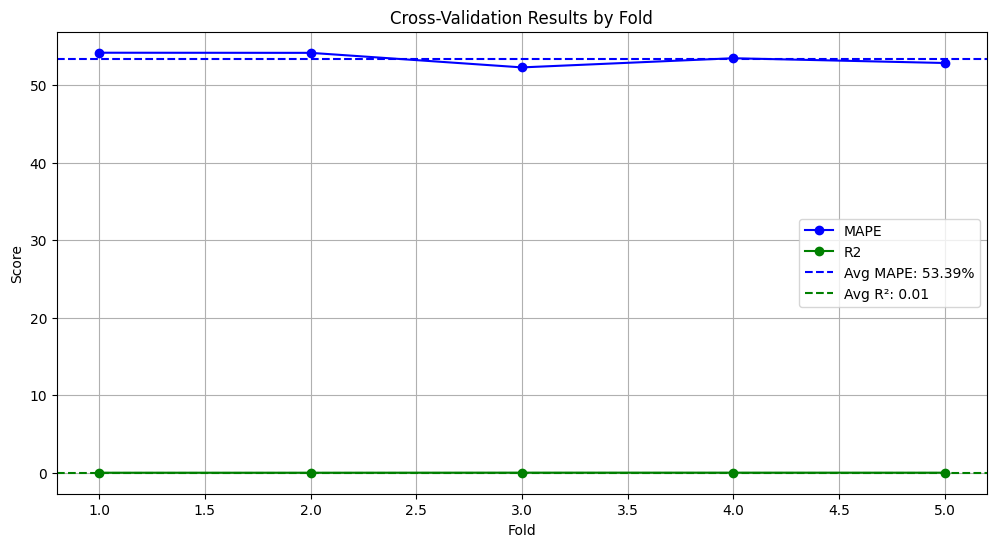

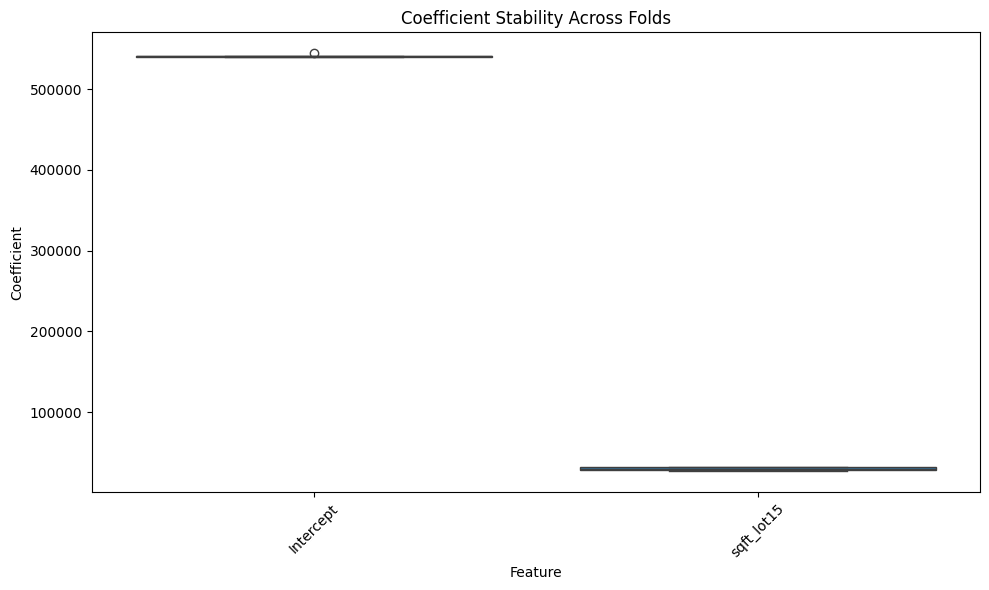

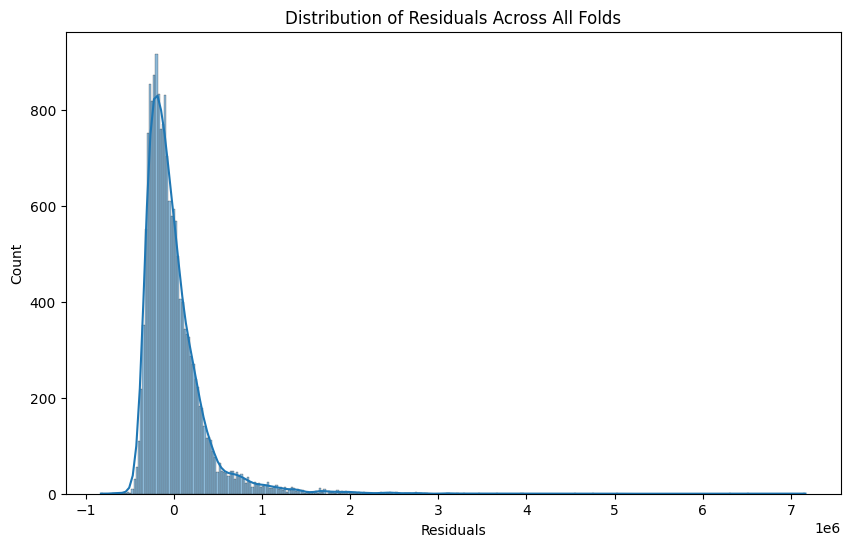

In [40]:
"""
House Price Prediction with Cross-Validation and Feature Stability Analysis
============================================================================
This script demonstrates a complete workflow for evaluating a regression model
for house price prediction. The focus is on cross-validation, performance metrics,
and coefficient stability analysis across folds.

Key Features:
1. Load and preprocess a dataset for regression analysis.
2. Perform k-fold cross-validation to evaluate model performance.
3. Analyze coefficient stability across folds to understand model consistency.
4. Visualize key results such as residuals, cross-validation metrics, and coefficient distributions.

Dependencies:
- pandas: For data handling and manipulation.
- numpy: For numerical calculations.
- statsmodels: For regression modeling.
- scikit-learn: For scaling, splitting, and metrics.
- matplotlib & seaborn: For data visualization.

Data Source:
This script uses a house pricing dataset available at a public URL.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Function to load and preprocess the dataset
def load_and_prepare_data(url, features):
    """
    Load the dataset from the specified URL and prepare it for analysis.

    Args:
        url (str): The URL to the dataset.
        features (list): List of feature columns to be used for regression.

    Returns:
        pd.DataFrame: Processed dataset with relevant features and target variable.
    """
    data = pd.read_csv(url)
    # Drop rows with missing values in features or target variable
    data = data.dropna(subset=features + ['price'])

    # Add a new feature: 'age' (current year minus year built)
    data['age'] = 2024 - data['yr_built']
    # Replace 'yr_built' with 'age' in the feature list if it exists
    if 'yr_built' in features:
        features.remove('yr_built')
        features.append('age')

    return data

# Function to calculate error metrics
def calculate_metrics(y_true, y_pred):
    """
    Calculate evaluation metrics for regression predictions.

    Args:
        y_true (pd.Series): Actual target values.
        y_pred (pd.Series): Predicted target values.

    Returns:
        dict: Dictionary containing MAPE, RMSE, and R² scores.
    """
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))        # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)                            # Coefficient of Determination (R²)

    return {
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2
    }

# Function to perform k-fold cross-validation
def perform_cross_validation(X, y, n_splits=5):
    """
    Perform k-fold cross-validation and collect results for analysis.

    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        n_splits (int): Number of folds for cross-validation.

    Returns:
        tuple: Metrics, predictions, residuals, models, and scalers for each fold.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold_metrics = []
    all_predictions = []
    all_residuals = []
    all_models = []
    all_scalers = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
        # Split the data into training and validation sets
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Scale the feature data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        # Add constant term for regression model
        X_train_const = sm.add_constant(X_train_scaled)
        model = sm.OLS(y_train, X_train_const).fit()

        # Make predictions
        X_val_const = sm.add_constant(X_val_scaled)
        predictions = model.predict(X_val_const)

        # Calculate metrics for the current fold
        metrics = calculate_metrics(y_val, predictions)
        metrics['Fold'] = fold
        fold_metrics.append(metrics)

        # Store results
        all_predictions.extend(predictions)
        all_residuals.extend(y_val - predictions)
        all_models.append(model)
        all_scalers.append(scaler)

    return pd.DataFrame(fold_metrics), all_predictions, all_residuals, all_models, all_scalers

# Function to visualize cross-validation results
def plot_cv_results(fold_metrics):
    """
    Plot cross-validation results (MAPE and R²) across folds.
    """
    plt.figure(figsize=(12, 6))

    metrics_to_plot = ['MAPE', 'R2']
    colors = ['blue', 'green']

    for metric, color in zip(metrics_to_plot, colors):
        values = fold_metrics[metric]
        plt.plot(range(1, len(values) + 1), values, marker='o', label=metric, color=color)

    plt.axhline(y=fold_metrics['MAPE'].mean(), color='blue', linestyle='--',
                label=f'Avg MAPE: {fold_metrics["MAPE"].mean():.2f}%')
    plt.axhline(y=fold_metrics['R2'].mean(), color='green', linestyle='--',
                label=f'Avg R²: {fold_metrics["R2"].mean():.2f}')

    plt.title('Cross-Validation Results by Fold')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to visualize coefficient stability
def plot_coefficient_stability(all_models, feature_names):
    """
    Plot the stability of coefficients across folds.
    """
    coef_data = []

    for fold, model in enumerate(all_models, 1):
        for feat, coef in zip(['Intercept'] + feature_names, model.params):
            coef_data.append({
                'Feature': feat,
                'Coefficient': coef,
                'Fold': fold
            })

    coef_df = pd.DataFrame(coef_data)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Feature', y='Coefficient', data=coef_df)
    plt.xticks(rotation=45)
    plt.title('Coefficient Stability Across Folds')
    plt.tight_layout()
    plt.show()

# Main function to run the entire workflow
def main():
    # Configuration
    url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
    features = ['sqft_lot15']

    # Load and prepare data
    data = load_and_prepare_data(url, features)
    X = data[features]
    y = data['price']

    # Perform cross-validation
    print("\nPerforming 5-fold cross-validation...")
    fold_metrics, all_predictions, all_residuals, all_models, all_scalers = \
        perform_cross_validation(X, y, n_splits=5)

    # Print cross-validation results
    print("\nCross-Validation Results:")
    print("\nMetrics by fold:")
    print(fold_metrics)

    print("\nAverage metrics across folds:")
    mean_metrics = fold_metrics.mean()
    std_metrics = fold_metrics.std()
    for metric in ['MAPE', 'RMSE', 'R2']:
        print(f"{metric}: {mean_metrics[metric]:.2f} ± {std_metrics[metric]:.2f}")

    # Plot results
    plot_cv_results(fold_metrics)
    plot_coefficient_stability(all_models, features)

    # Plot final residual distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(all_residuals, kde=True)
    plt.title('Distribution of Residuals Across All Folds')
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.show()

if __name__ == "__main__":
    main()